In [355]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [356]:
df = pd.read_csv('covid_19_india.csv')

In [357]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [358]:
df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu', 'Telangana',
       'Telangana***', 'Telengana***', 'Maharashtra***', 'Chandigarh***',
       'Punjab***'], dtype=object)

In [359]:
df.drop('Sno', inplace=True, axis=1)
df.drop('ConfirmedIndianNational', inplace=True, axis=1)
df.drop('ConfirmedForeignNational', inplace=True, axis=1)

In [360]:
df.head(2)

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,30/01/20,6:00 PM,Kerala,0,0,1
1,31/01/20,6:00 PM,Kerala,0,0,1


In [361]:
df.isnull().sum()

,0
Date,0
Time,0
State/UnionTerritory,0
Cured,0
Deaths,0
Confirmed,0


In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9291 entries, 0 to 9290
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  9291 non-null   object
 1   Time                  9291 non-null   object
 2   State/UnionTerritory  9291 non-null   object
 3   Cured                 9291 non-null   int64 
 4   Deaths                9291 non-null   int64 
 5   Confirmed             9291 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 435.6+ KB


In [363]:
df['Day'] = df['Date'].str.split('/').str[0]
df['Month'] = df['Date'].str.split('/').str[1]
df['Year'] = df['Date'].str.split('/').str[2]

In [364]:
df.head(2)

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Day,Month,Year
0,30/01/20,6:00 PM,Kerala,0,0,1,30,01,20
1,31/01/20,6:00 PM,Kerala,0,0,1,31,01,20


In [365]:
df.drop('Date', inplace=True, axis=1)

In [366]:
df.rename(columns={'State/UnionTerritory':'State'}, inplace=True)

In [367]:
df.head(2)

,Time,State,Cured,Deaths,Confirmed,Day,Month,Year
0,6:00 PM,Kerala,0,0,1,30,01,20
1,6:00 PM,Kerala,0,0,1,31,01,20


In [368]:
df['Time'] = df['Time'].str.split(' ').str[0]
df.head(2)

,Time,State,Cured,Deaths,Confirmed,Day,Month,Year
0,6:00,Kerala,0,0,1,30,01,20
1,6:00,Kerala,0,0,1,31,01,20


In [369]:
df['Active'] = df['Confirmed'] - (df['Cured'] + df['Deaths'])
df.head(10)

,Time,State,Cured,Deaths,Confirmed,Day,Month,Year,Active
0,6:00,Kerala,0,0,1,30,01,20,1
1,6:00,Kerala,0,0,1,31,01,20,1
2,6:00,Kerala,0,0,2,01,02,20,2
3,6:00,Kerala,0,0,3,02,02,20,3
4,6:00,Kerala,0,0,3,03,02,20,3
5,6:00,Kerala,0,0,3,04,02,20,3
6,6:00,Kerala,0,0,3,05,02,20,3
7,6:00,Kerala,0,0,3,06,02,20,3
8,6:00,Kerala,0,0,3,07,02,20,3
9,6:00,Kerala,0,0,3,08,02,20,3


In [370]:
df = df.sort_values(by=["State", "Day", "Month", "Year"])
df.head(20)

,Time,State,Cured,Deaths,Confirmed,Day,Month,Year,Active
530,7:30,Andaman and Nicobar Islands,0,0,10,01,04,20,10
1478,5:00,Andaman and Nicobar Islands,16,0,33,01,05,20,17
2522,8:00,Andaman and Nicobar Islands,33,0,33,01,06,20,0
3603,8:00,Andaman and Nicobar Islands,50,0,97,01,07,20,47
4706,8:00,Andaman and Nicobar Islands,214,5,548,01,08,20,329
5791,8:00,Andaman and Nicobar Islands,2647,46,3132,01,09,20,439
6841,8:00,Andaman and Nicobar Islands,3608,53,3835,01,10,20,174
7926,8:00,Andaman and Nicobar Islands,4100,59,4332,01,11,20,173
8976,8:00,Andaman and Nicobar Islands,4550,61,4710,01,12,20,99
559,6:00,Andaman and Nicobar Islands,0,0,10,02,04,20,10


In [371]:
df.drop('Time', inplace=True, axis=1)

In [372]:
df.head(20)

,State,Cured,Deaths,Confirmed,Day,Month,Year,Active
530,Andaman and Nicobar Islands,0,0,10,01,04,20,10
1478,Andaman and Nicobar Islands,16,0,33,01,05,20,17
2522,Andaman and Nicobar Islands,33,0,33,01,06,20,0
3603,Andaman and Nicobar Islands,50,0,97,01,07,20,47
4706,Andaman and Nicobar Islands,214,5,548,01,08,20,329
5791,Andaman and Nicobar Islands,2647,46,3132,01,09,20,439
6841,Andaman and Nicobar Islands,3608,53,3835,01,10,20,174
7926,Andaman and Nicobar Islands,4100,59,4332,01,11,20,173
8976,Andaman and Nicobar Islands,4550,61,4710,01,12,20,99
559,Andaman and Nicobar Islands,0,0,10,02,04,20,10


In [373]:
df['State'] = df['State'].str.strip()

In [374]:
df = df.groupby('State')[['Cured','Deaths','Confirmed','Active']].sum().reset_index()

In [375]:
df.head(10)

,State,Cured,Deaths,Confirmed,Active
0,Andaman and Nicobar Islands,430671,6420,483761,46670
1,Andhra Pradesh,76025563,715536,84815303,8074204
2,Arunachal Pradesh,1084070,3268,1314087,226749
3,Assam,18920926,85655,21703581,2697000
4,Bihar,21690764,121993,23891385,2078628
5,Cases being reassigned to states,0,0,345565,345565
6,Chandigarh,1181720,20455,1387878,185703
7,Chandigarh***,14381,246,15636,1009
8,Chhattisgarh,13106333,170085,16051609,2775191
9,Dadar Nagar Haveli,14,0,186,172


In [376]:
df.drop([5], inplace=True)
df.head(10)

,State,Cured,Deaths,Confirmed,Active
0,Andaman and Nicobar Islands,430671,6420,483761,46670
1,Andhra Pradesh,76025563,715536,84815303,8074204
2,Arunachal Pradesh,1084070,3268,1314087,226749
3,Assam,18920926,85655,21703581,2697000
4,Bihar,21690764,121993,23891385,2078628
6,Chandigarh,1181720,20455,1387878,185703
7,Chandigarh***,14381,246,15636,1009
8,Chhattisgarh,13106333,170085,16051609,2775191
9,Dadar Nagar Haveli,14,0,186,172
10,Dadra and Nagar Haveli and Daman and Diu,352515,296,384618,31807


In [377]:
df['State'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chandigarh***', 'Chhattisgarh', 'Dadar Nagar Haveli',
       'Dadra and Nagar Haveli and Daman and Diu', 'Daman & Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Madhya Pradesh', 'Maharashtra', 'Maharashtra***', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Punjab***', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Telangana***', 'Telengana', 'Telengana***',
       'Tripura', 'Unassigned', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'], dtype=object)

In [378]:
state_corrections = {
    "Telengana": "Telangana",
    "Telangana***": "Telangana",
    "Chandigarh***": "Chandigarh",
    "Punjab***": "Punjab",
    "Maharashtra***": "Maharashtra"
}

df["State"] = df["State"].replace(state_corrections)


In [379]:
df.head(20)

,State,Cured,Deaths,Confirmed,Active
0,Andaman and Nicobar Islands,430671,6420,483761,46670
1,Andhra Pradesh,76025563,715536,84815303,8074204
2,Arunachal Pradesh,1084070,3268,1314087,226749
3,Assam,18920926,85655,21703581,2697000
4,Bihar,21690764,121993,23891385,2078628
6,Chandigarh,1181720,20455,1387878,185703
7,Chandigarh,14381,246,15636,1009
8,Chhattisgarh,13106333,170085,16051609,2775191
9,Dadar Nagar Haveli,14,0,186,172
10,Dadra and Nagar Haveli and Daman and Diu,352515,296,384618,31807


In [380]:
df = df.groupby('State')[['Cured','Deaths','Confirmed','Active']].sum().reset_index()

In [381]:
df.head(20)

,State,Cured,Deaths,Confirmed,Active
0,Andaman and Nicobar Islands,430671,6420,483761,46670
1,Andhra Pradesh,76025563,715536,84815303,8074204
2,Arunachal Pradesh,1084070,3268,1314087,226749
3,Assam,18920926,85655,21703581,2697000
4,Bihar,21690764,121993,23891385,2078628
5,Chandigarh,1196101,20701,1403514,186712
6,Chhattisgarh,13106333,170085,16051609,2775191
7,Dadar Nagar Haveli,14,0,186,172
8,Dadra and Nagar Haveli and Daman and Diu,352515,296,384618,31807
9,Daman & Diu,0,0,2,2


In [382]:
#Case Fatality Rate (Daily new deaths):-

df['Case_Fatality_Rate'] = round((df['Deaths']/df['Confirmed'])*100)
df.head(20)

,State,Cured,Deaths,Confirmed,Active,Case_Fatality_Rate
0,Andaman and Nicobar Islands,430671,6420,483761,46670,1.0
1,Andhra Pradesh,76025563,715536,84815303,8074204,1.0
2,Arunachal Pradesh,1084070,3268,1314087,226749,0.0
3,Assam,18920926,85655,21703581,2697000,0.0
4,Bihar,21690764,121993,23891385,2078628,1.0
5,Chandigarh,1196101,20701,1403514,186712,1.0
6,Chhattisgarh,13106333,170085,16051609,2775191,1.0
7,Dadar Nagar Haveli,14,0,186,172,0.0
8,Dadra and Nagar Haveli and Daman and Diu,352515,296,384618,31807,0.0
9,Daman & Diu,0,0,2,2,0.0


In [383]:
#Test Positvity Rate :-

df['Test_positivity_rate'] = round((df['Cured']/df['Confirmed'])*100)
df.head(20)

,State,Cured,Deaths,Confirmed,Active,Case_Fatality_Rate,Test_positivity_rate
0,Andaman and Nicobar Islands,430671,6420,483761,46670,1.0,89.0
1,Andhra Pradesh,76025563,715536,84815303,8074204,1.0,90.0
2,Arunachal Pradesh,1084070,3268,1314087,226749,0.0,82.0
3,Assam,18920926,85655,21703581,2697000,0.0,87.0
4,Bihar,21690764,121993,23891385,2078628,1.0,91.0
5,Chandigarh,1196101,20701,1403514,186712,1.0,85.0
6,Chhattisgarh,13106333,170085,16051609,2775191,1.0,82.0
7,Dadar Nagar Haveli,14,0,186,172,0.0,8.0
8,Dadra and Nagar Haveli and Daman and Diu,352515,296,384618,31807,0.0,92.0
9,Daman & Diu,0,0,2,2,0.0,0.0


In [384]:
# Top states with most confirmed cases

df.sort_values(by="Confirmed", ascending=False, inplace= True)

In [386]:
df.head(20)

,State,Cured,Deaths,Confirmed,Active,Case_Fatality_Rate,Test_positivity_rate
21,Maharashtra,147793712,5113730,181173762,28266320,3.0,82.0
1,Andhra Pradesh,76025563,715536,84815303,8074204,1.0,90.0
31,Tamil Nadu,74243503,1291048,82789540,7254989,2.0,90.0
17,Karnataka,67314778,1144931,79354749,10895040,1.0,85.0
36,Uttar Pradesh,43431970,756398,50283822,6095454,2.0,86.0
10,Delhi,40752525,931396,46445978,4762057,2.0,88.0
38,West Bengal,33366214,736550,38349942,4247178,2.0,87.0
18,Kerala,28915377,132008,36407056,7359671,0.0,79.0
26,Odisha,24565654,127833,27395482,2701995,0.0,90.0
32,Telangana,22483827,163121,26015727,3368779,1.0,86.0


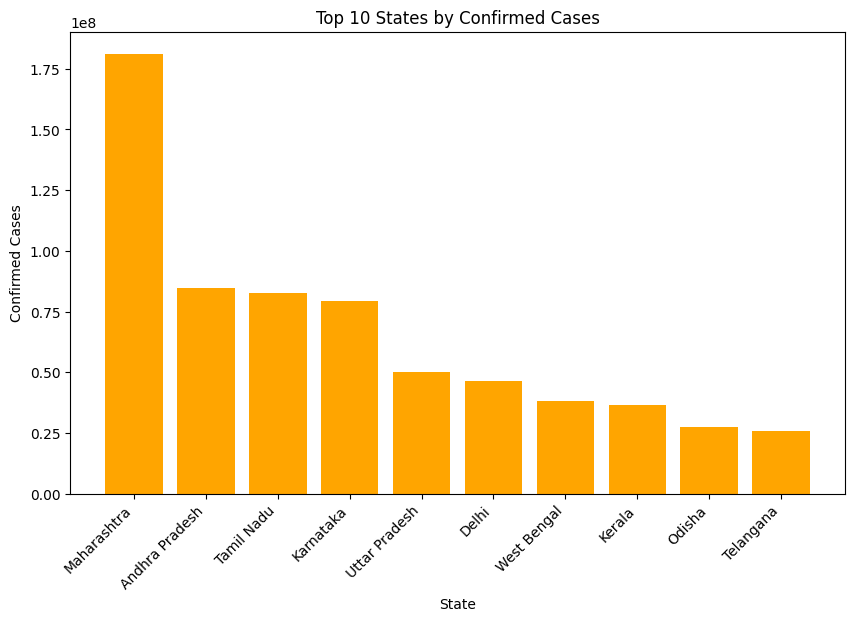

In [390]:
top10_confirmed = df.sort_values(by="Confirmed", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top10_confirmed["State"], top10_confirmed["Confirmed"], color="orange")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 States by Confirmed Cases")
plt.xlabel("State")
plt.ylabel("Confirmed Cases")
plt.show()


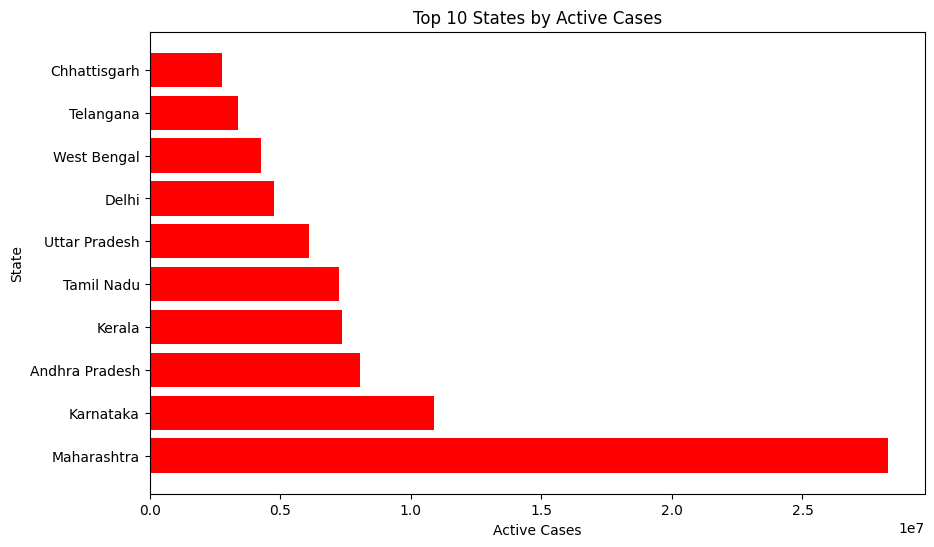

In [391]:
top10_active = df.sort_values(by="Active", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top10_active["State"], top10_active["Active"], color="red")
plt.title("Top 10 States by Active Cases")
plt.xlabel("Active Cases")
plt.ylabel("State")
plt.show()


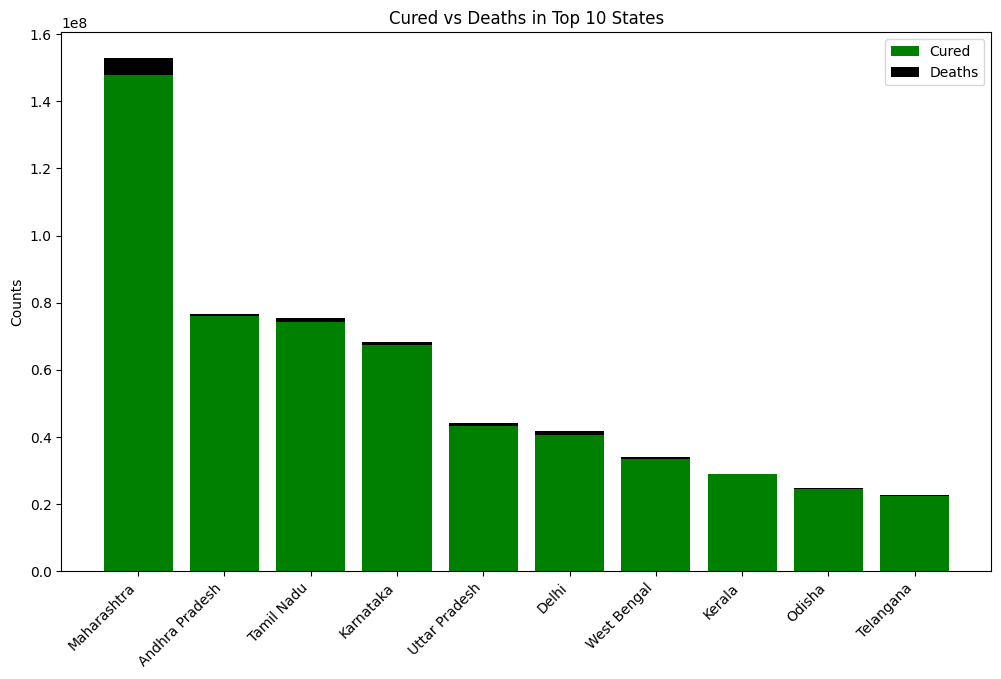

In [392]:
top10 = df.sort_values(by="Confirmed", ascending=False).head(10)

plt.figure(figsize=(12,7))
plt.bar(top10["State"], top10["Cured"], label="Cured", color="green")
plt.bar(top10["State"], top10["Deaths"], bottom=top10["Cured"], label="Deaths", color="black")
plt.xticks(rotation=45, ha="right")
plt.title("Cured vs Deaths in Top 10 States")
plt.ylabel("Counts")
plt.legend()
plt.show()


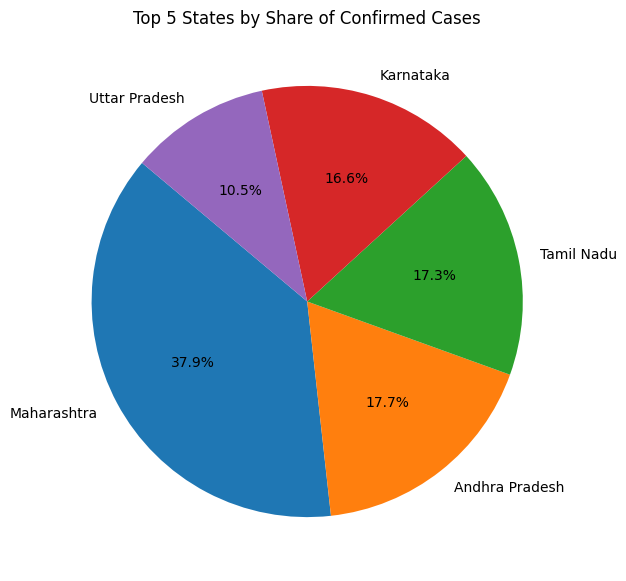

In [393]:
top5 = df.sort_values(by="Confirmed", ascending=False).head(5)

plt.figure(figsize=(7,7))
plt.pie(top5["Confirmed"], labels=top5["State"], autopct="%1.1f%%", startangle=140)
plt.title("Top 5 States by Share of Confirmed Cases")
plt.show()


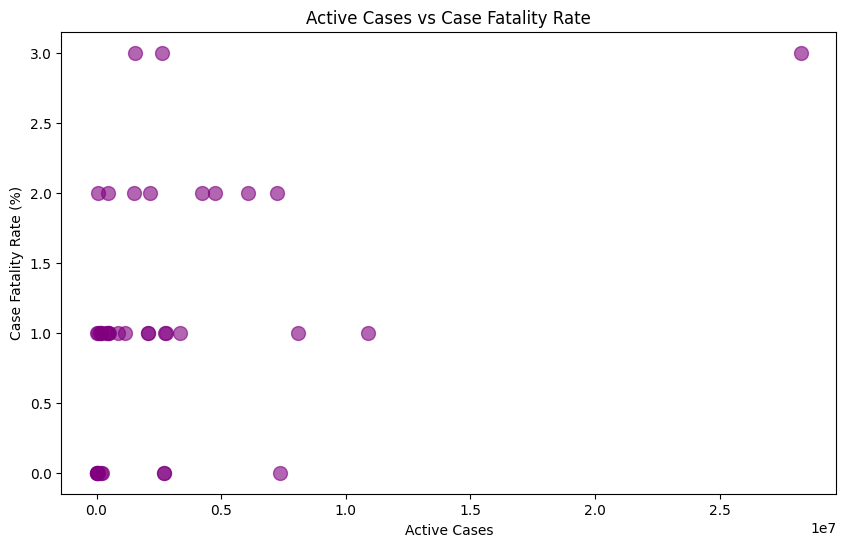

In [394]:
plt.figure(figsize=(10,6))
plt.scatter(df["Active"], df["Case_Fatality_Rate"], color="purple", alpha=0.6, s=100)
plt.title("Active Cases vs Case Fatality Rate")
plt.xlabel("Active Cases")
plt.ylabel("Case Fatality Rate (%)")
plt.show()


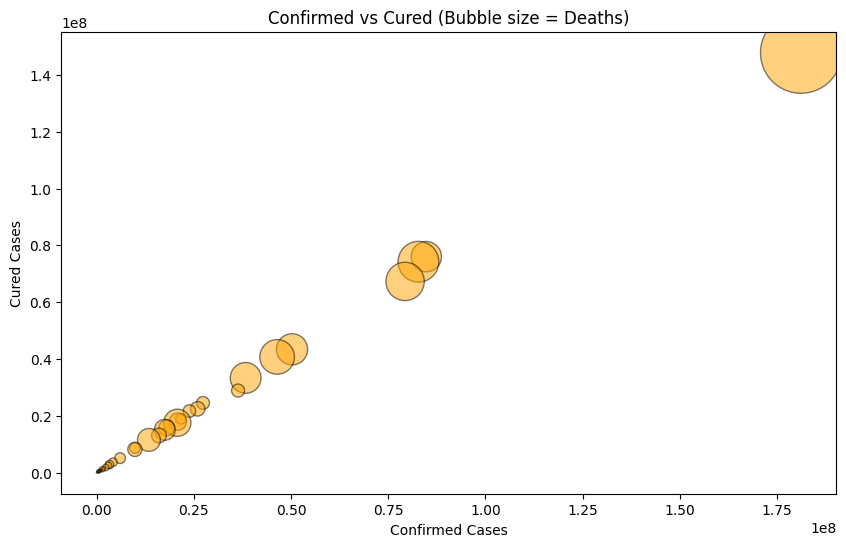

In [399]:
plt.figure(figsize=(10,6))
plt.scatter(df["Confirmed"], df["Cured"],
            s=df["Deaths"]/1500,
            alpha=0.5, c="orange", edgecolors="black")
plt.title("Confirmed vs Cured (Bubble size = Deaths)")
plt.xlabel("Confirmed Cases")
plt.ylabel("Cured Cases")
plt.show()


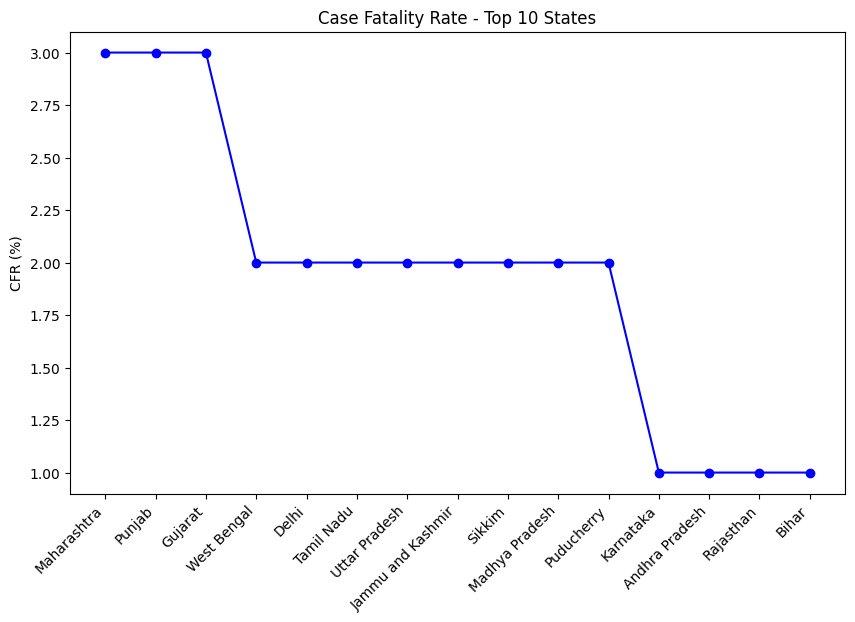

In [397]:
top10_cfr = df.sort_values(by="Case_Fatality_Rate", ascending=False).head(15)

plt.figure(figsize=(10,6))
plt.plot(top10_cfr["State"], top10_cfr["Case_Fatality_Rate"], marker="o", linestyle="-", color="blue")
plt.xticks(rotation=45, ha="right")
plt.title("Case Fatality Rate - Top 10 States")
plt.ylabel("CFR (%)")
plt.show()


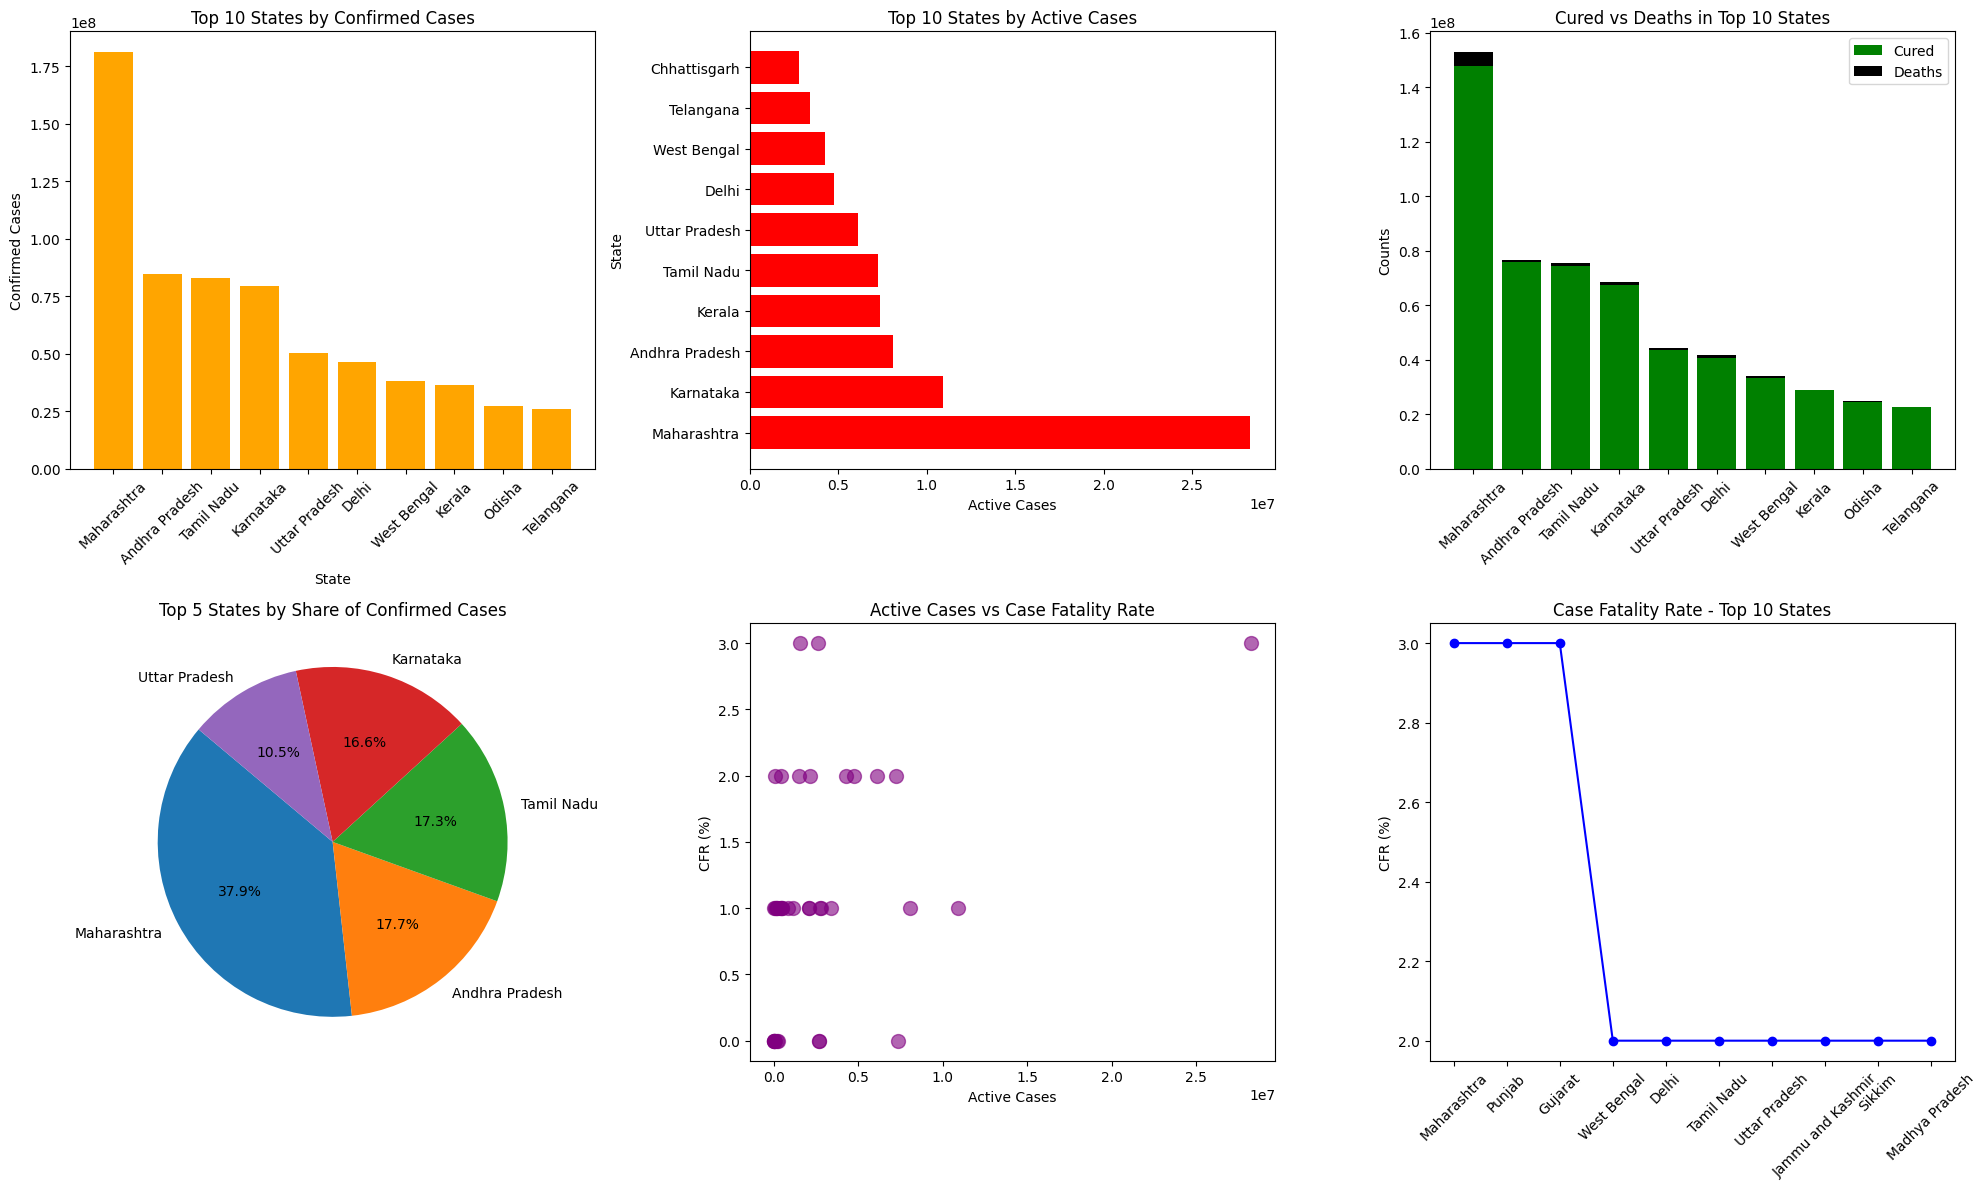

In [401]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

#Bar Chart of Top 10 States by Confirmed Cases
top10_confirmed = df.sort_values(by="Confirmed", ascending=False).head(10)
axes[0,0].bar(top10_confirmed["State"], top10_confirmed["Confirmed"], color="orange")
axes[0,0].set_title("Top 10 States by Confirmed Cases")
axes[0,0].set_xlabel("State")
axes[0,0].set_ylabel("Confirmed Cases")
axes[0,0].tick_params(axis='x', rotation=45)

#Horizontal Bar Chart of Top 10 States by Active Cases
top10_active = df.sort_values(by="Active", ascending=False).head(10)
axes[0,1].barh(top10_active["State"], top10_active["Active"], color="red")
axes[0,1].set_title("Top 10 States by Active Cases")
axes[0,1].set_xlabel("Active Cases")
axes[0,1].set_ylabel("State")

#Stacked Bar Chart of Cured vs Deaths
top10 = df.sort_values(by="Confirmed", ascending=False).head(10)
axes[0,2].bar(top10["State"], top10["Cured"], label="Cured", color="green")
axes[0,2].bar(top10["State"], top10["Deaths"], bottom=top10["Cured"], label="Deaths", color="black")
axes[0,2].set_title("Cured vs Deaths in Top 10 States")
axes[0,2].set_ylabel("Counts")
axes[0,2].tick_params(axis='x', rotation=45)
axes[0,2].legend()

#Pie Chart of Distribution of Confirmed Cases (Top 5 States)
top5 = df.sort_values(by="Confirmed", ascending=False).head(5)
axes[1,0].pie(top5["Confirmed"], labels=top5["State"], autopct="%1.1f%%", startangle=140)
axes[1,0].set_title("Top 5 States by Share of Confirmed Cases")

#Scatter Plot of Active Cases vs Case Fatality Rate
axes[1,1].scatter(df["Active"], df["Case_Fatality_Rate"], color="purple", alpha=0.6, s=100)
axes[1,1].set_title("Active Cases vs Case Fatality Rate")
axes[1,1].set_xlabel("Active Cases")
axes[1,1].set_ylabel("CFR (%)")

#Line Chart of Top 10 Case Fatality Rate
top10_cfr = df.sort_values(by="Case_Fatality_Rate", ascending=False).head(10)
axes[1,2].plot(top10_cfr["State"], top10_cfr["Case_Fatality_Rate"], marker="o", linestyle="-", color="blue")
axes[1,2].set_title("Case Fatality Rate - Top 10 States")
axes[1,2].set_ylabel("CFR (%)")
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
